In [23]:
import pandas as pd
import numpy as np

from lifelines import KaplanMeierFitter
from lifelines.utils import datetimes_to_durations

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dtypes = {
    'ip': 'uint32',
    'app': 'uint16',
    'device': 'uint16',
    'os': 'uint16',
    'channel': 'uint16',
    'is_attributed': 'uint8'
}
to_read = ['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time', 'is_attributed']
to_parse = ['click_time', 'attributed_time']

In [3]:
train = pd.read_csv('../data/raw/train_sample.csv', usecols=to_read, dtype=dtypes, parse_dates=to_parse)
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0


In [4]:
kmf = KaplanMeierFitter()

In [49]:
??datetimes_to_durations

In [50]:
fill_date = train['click_time'].max()
T, E = datetimes_to_durations(train['click_time'], train['attributed_time'], fill_date=fill_date, freq='s')

In [51]:
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 100000 observations, 99773 censored>

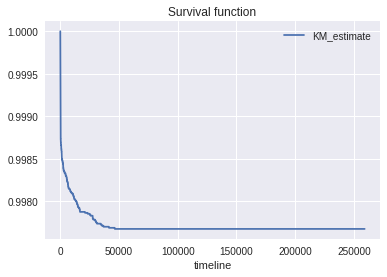

In [52]:
kmf.survival_function_.plot()
plt.title('Survival function');

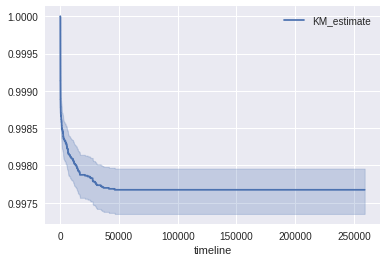

In [53]:
kmf.plot()

In [58]:
kmf.median_

inf

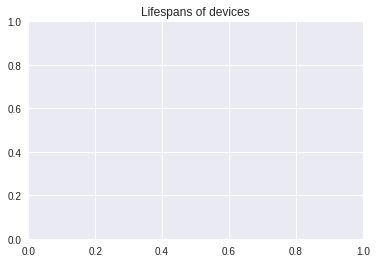

In [57]:
fig = plt.figure(figsize=(12, 8)) 
ax = plt.subplot(111)

device1 = (train['device'] == 1)
kmf.fit(T[device1], event_observed=E[device1], label="Device 1")
kmf.plot(ax=ax)

kmf.fit(T[~device1], event_observed=E[~device1], label="Other")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of devices");